In [ ]:
# 1st import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
!ls -ahl

total 20K
drwxr-xr-x 1 root root 4.0K Aug 29 15:41 .
drwxr-xr-x 1 root root 4.0K Aug 29 15:38 ..
drwxr-xr-x 4 root root 4.0K Aug 25 13:35 .config
drwx------ 5 root root 4.0K Aug 29 15:41 drive
drwxr-xr-x 1 root root 4.0K Aug 25 13:35 sample_data


In [ ]:
!rm -Rf flowers
!unzip 'drive/MyDrive/flowers.zip' # this flowers.zip file is available in our drive

Archive:  drive/MyDrive/flowers.zip
   creating: flowers/
   creating: flowers/daisy/
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflati

In [ ]:
!ls flowers
!rm -Rf data

daisy  dandelion  rose	sunflower  tulip


In [ ]:
# We use split-floder to split, train, validation, test data
!pip install split-folders

In [ ]:
# Now split the data from flower directory and then distribute in the subdirectories
import splitfolders
splitfolders.ratio('flowers', output='data', seed=1337, ratio=(0.8, 0.1, 0.1))

Copying files: 4326 files [00:01, 3084.15 files/s]


In [ ]:
import os
def files_count(base_dir):
  path = os.walk(base_dir, topdown=True)

  for root, directories, files in path:
    total = 0
    for directory in directories:
      full_path = os.path.join(base_dir, directory)
      # print full path
      ln =len(os.listdir(full_path))
      print(full_path, ln)
      total +=ln
    print('total', root, total)

files_count('flowers')
files_count('data/train')
files_count('data/val')
files_count('data/test')

flowers/tulip 984
flowers/dandelion 1055
flowers/sunflower 734
flowers/daisy 769
flowers/rose 784
total flowers 4326
total flowers/tulip 0
total flowers/dandelion 0
total flowers/sunflower 0
total flowers/daisy 0
total flowers/rose 0
data/train/tulip 787
data/train/dandelion 844
data/train/sunflower 587
data/train/daisy 615
data/train/rose 627
total data/train 3460
total data/train/tulip 0
total data/train/dandelion 0
total data/train/sunflower 0
total data/train/daisy 0
total data/train/rose 0
data/val/tulip 98
data/val/dandelion 105
data/val/sunflower 73
data/val/daisy 76
data/val/rose 78
total data/val 430
total data/val/tulip 0
total data/val/dandelion 0
total data/val/sunflower 0
total data/val/daisy 0
total data/val/rose 0
data/test/tulip 99
data/test/dandelion 106
data/test/sunflower 74
data/test/daisy 78
data/test/rose 79
total data/test 436
total data/test/tulip 0
total data/test/dandelion 0
total data/test/sunflower 0
total data/test/daisy 0
total data/test/rose 0


# Creating Generator

In [ ]:
# generator working
# take batch of images, convert into tensor, array, auto,
# This generator is use for read imgs from file and then give to the AL-Algorithm
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = 'data/train'
validation_dir = 'data/val'
test_dir = 'data/test'

batch_size = 20

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(120, 120),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3457 images belonging to 5 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(120, 120),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 430 images belonging to 5 classes.


## Now Build  CNN model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

## Now Write steps_per_epochs, to avoid error

In [ ]:
steps_per_epoch= 3457 // batch_size
validation_steps = 430 // batch_size


In [ ]:
def accuracy_graph(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

In [ ]:
print('training steps:', steps_per_epoch, 'validation_steps:', validation_steps)

training steps: 172 validation_steps: 21


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/30
172/172 [==============================] - 15s 84ms/step - loss: 1.2991 - acc: 0.4437 - val_loss: 1.0882 - val_acc: 0.5619
Epoch 2/30
172/172 [==============================] - 14s 79ms/step - loss: 0.9935 - acc: 0.6180 - val_loss: 0.8842 - val_acc: 0.6619
Epoch 3/30
172/172 [==============================] - 14s 80ms/step - loss: 0.7987 - acc: 0.7053 - val_loss: 0.7875 - val_acc: 0.6905
Epoch 4/30
172/172 [==============================] - 14s 79ms/step - loss: 0.6306 - acc: 0.7603 - val_loss: 0.8615 - val_acc: 0.6738
Epoch 5/30
172/172 [==============================] - 14s 79ms/step - loss: 0.4419 - acc: 0.8362 - val_loss: 1.2794 - val_acc: 0.6524
Epoch 6/30
172/172 [==============================] - 13s 78ms/step - loss: 0.3089 - acc: 0.8912 - val_loss: 1.2725 - val_acc: 0.6548
Epoch 7/30
172/172 [==============================] - 13s 78ms/step - loss: 0.1797 - acc: 0.9392 - val_loss: 1.5911 - val_acc: 0.6786
Epoch 8/30
172/172 [==============================] - 13s 78ms

In [ ]:
model.save('flower_cnn_1.h5')
!cp flower_cnn.h5 'drive/MyDrive'

In [ ]:
# plt.imshow(train_dir[0]), First convert into real shape (120, 120, 3), This image is Flatten so, we convert into the real shape

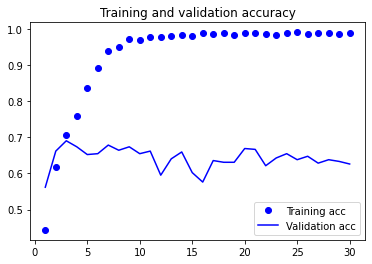

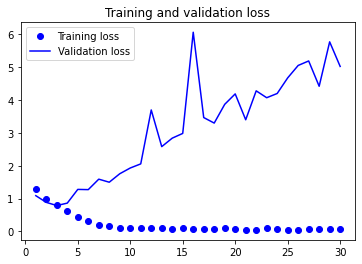

In [ ]:
accuracy_graph(history)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 128)      

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/10
172/172 [==============================] - 14s 76ms/step - loss: 1.2650 - acc: 0.4379 - val_loss: 1.1361 - val_acc: 0.5214
Epoch 2/10
172/172 [==============================] - 13s 75ms/step - loss: 0.9999 - acc: 0.5944 - val_loss: 0.8857 - val_acc: 0.6286
Epoch 3/10
172/172 [==============================] - 13s 75ms/step - loss: 0.8710 - acc: 0.6631 - val_loss: 0.8392 - val_acc: 0.6786
Epoch 4/10
172/172 [==============================] - 13s 76ms/step - loss: 0.7886 - acc: 0.6945 - val_loss: 0.7881 - val_acc: 0.6952
Epoch 5/10
172/172 [==============================] - 13s 75ms/step - loss: 0.7340 - acc: 0.7271 - val_loss: 0.8208 - val_acc: 0.6643
Epoch 6/10
172/172 [==============================] - 13s 75ms/step - loss: 0.6464 - acc: 0.7582 - val_loss: 0.7764 - val_acc: 0.7238
Epoch 7/10
172/172 [==============================] - 13s 76ms/step - loss: 0.5398 - acc: 0.7975 - val_loss: 0.8315 - val_acc: 0.6714
Epoch 8/10
172/172 [==============================] - 13s 73ms

In [ ]:
model.save('flower_cnn_2.h5')
!cp flower_cnn_2.h5 'drive/MyDrive'

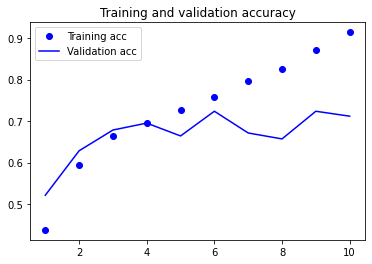

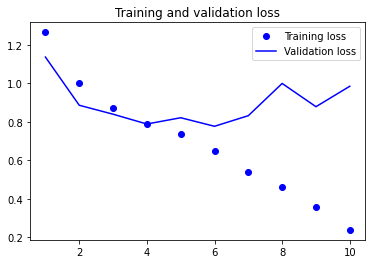

In [ ]:
accuracy_graph(history)

## Now using data augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 50

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='categorical')

Found 3457 images belonging to 5 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='categorical')

Found 430 images belonging to 5 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
opt = tf.keras.optimizers.Adam(epsilon=1e-07,)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

Epoch 1/10
69/69 [==============================] - 12s 164ms/step - loss: 1.3245 - acc: 0.4106 - val_loss: 1.1852 - val_acc: 0.4860
Epoch 2/10
69/69 [==============================] - 11s 161ms/step - loss: 1.1109 - acc: 0.5474 - val_loss: 0.9645 - val_acc: 0.6000
Epoch 3/10
69/69 [==============================] - 11s 160ms/step - loss: 0.9862 - acc: 0.5941 - val_loss: 0.9091 - val_acc: 0.6233
Epoch 4/10
69/69 [==============================] - 11s 159ms/step - loss: 0.8928 - acc: 0.6337 - val_loss: 0.8559 - val_acc: 0.6605
Epoch 5/10
69/69 [==============================] - 11s 161ms/step - loss: 0.8648 - acc: 0.6542 - val_loss: 0.8004 - val_acc: 0.6698
Epoch 6/10
69/69 [==============================] - 11s 166ms/step - loss: 0.7912 - acc: 0.6936 - val_loss: 1.0001 - val_acc: 0.6023
Epoch 7/10
69/69 [==============================] - 11s 165ms/step - loss: 0.7818 - acc: 0.6950 - val_loss: 0.7796 - val_acc: 0.7047
Epoch 8/10
69/69 [==============================] - 11s 161ms/step - 

In [ ]:
model.save('flower_cnn_2.h5')
!cp flower_cnn_2.h5 'drive/MyDrive'

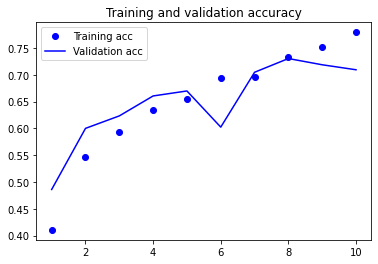

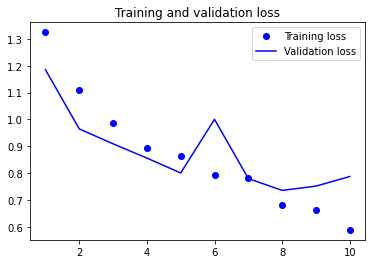

In [ ]:
accuracy_graph(history)


## This is Final model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
opt = tf.keras.optimizers.Adam(epsilon=1e-4,)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps)

Epoch 1/10
69/69 [==============================] - 12s 163ms/step - loss: 1.4245 - acc: 0.3466 - val_loss: 1.2060 - val_acc: 0.4525
Epoch 2/10
69/69 [==============================] - 11s 159ms/step - loss: 1.1621 - acc: 0.5031 - val_loss: 1.0444 - val_acc: 0.5550
Epoch 3/10
69/69 [==============================] - 11s 160ms/step - loss: 1.0475 - acc: 0.5724 - val_loss: 0.9275 - val_acc: 0.6650
Epoch 4/10
69/69 [==============================] - 11s 160ms/step - loss: 0.9689 - acc: 0.6064 - val_loss: 0.9436 - val_acc: 0.6275
Epoch 5/10
69/69 [==============================] - 11s 159ms/step - loss: 0.9077 - acc: 0.6334 - val_loss: 0.9643 - val_acc: 0.6200
Epoch 6/10
69/69 [==============================] - 11s 159ms/step - loss: 0.8372 - acc: 0.6636 - val_loss: 0.8235 - val_acc: 0.7000
Epoch 7/10
69/69 [==============================] - 11s 159ms/step - loss: 0.7524 - acc: 0.7053 - val_loss: 0.7556 - val_acc: 0.7200
Epoch 8/10
69/69 [==============================] - 12s 167ms/step - 

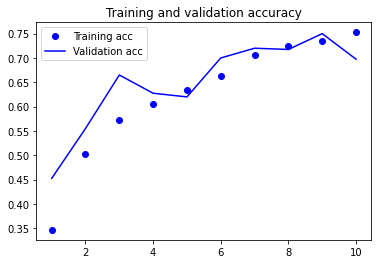

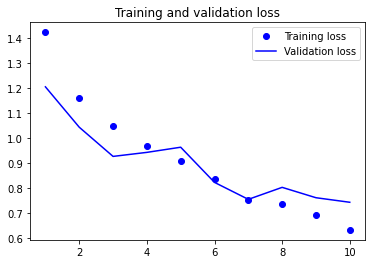

In [ ]:
accuracy_graph(history)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
opt = tf.keras.optimizers.RMSprop(epsilon=1e-04,)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_steps)

Epoch 1/15
69/69 [==============================] - 12s 167ms/step - loss: 1.4281 - acc: 0.3657 - val_loss: 1.1941 - val_acc: 0.5200
Epoch 2/15
69/69 [==============================] - 11s 162ms/step - loss: 1.1857 - acc: 0.5063 - val_loss: 1.2160 - val_acc: 0.4750
Epoch 3/15
69/69 [==============================] - 11s 161ms/step - loss: 1.0537 - acc: 0.5750 - val_loss: 1.0449 - val_acc: 0.5950
Epoch 4/15
69/69 [==============================] - 11s 161ms/step - loss: 0.9750 - acc: 0.6208 - val_loss: 0.9961 - val_acc: 0.6400
Epoch 5/15
69/69 [==============================] - 11s 163ms/step - loss: 0.9078 - acc: 0.6475 - val_loss: 0.8804 - val_acc: 0.6650
Epoch 6/15
69/69 [==============================] - 11s 160ms/step - loss: 0.8495 - acc: 0.6683 - val_loss: 0.8480 - val_acc: 0.6850
Epoch 7/15
69/69 [==============================] - 11s 161ms/step - loss: 0.8121 - acc: 0.7027 - val_loss: 0.8120 - val_acc: 0.6775
Epoch 8/15
69/69 [==============================] - 11s 163ms/step - 

In [ ]:
model.save('flower_cnn_3.h5')
!cp flower_cnn_3.h5 'drive/MyDrive'

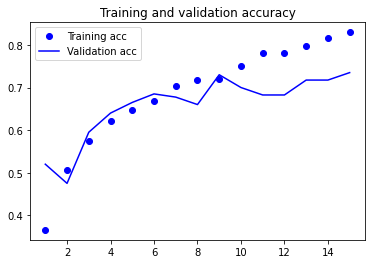

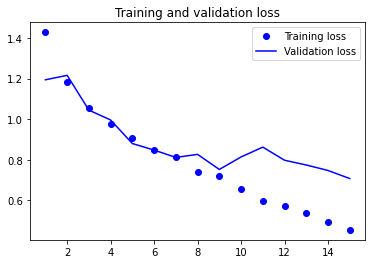

In [ ]:
accuracy_graph(history)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 128)       

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=11,
    validation_data=validation_generator,
    validation_steps=validation_steps)

Epoch 1/11
69/69 [==============================] - 12s 167ms/step - loss: 1.3879 - acc: 0.3789 - val_loss: 1.1884 - val_acc: 0.4350
Epoch 2/11
69/69 [==============================] - 11s 163ms/step - loss: 1.1296 - acc: 0.5084 - val_loss: 1.1071 - val_acc: 0.5225
Epoch 3/11
69/69 [==============================] - 11s 162ms/step - loss: 1.0104 - acc: 0.5829 - val_loss: 0.8895 - val_acc: 0.6375
Epoch 4/11
69/69 [==============================] - 11s 163ms/step - loss: 0.8971 - acc: 0.6434 - val_loss: 0.7967 - val_acc: 0.6875
Epoch 5/11
69/69 [==============================] - 11s 166ms/step - loss: 0.8295 - acc: 0.6810 - val_loss: 0.8469 - val_acc: 0.6925
Epoch 6/11
69/69 [==============================] - 11s 165ms/step - loss: 0.7790 - acc: 0.6912 - val_loss: 0.7872 - val_acc: 0.7125
Epoch 7/11
69/69 [==============================] - 11s 164ms/step - loss: 0.7259 - acc: 0.7200 - val_loss: 0.7116 - val_acc: 0.7350
Epoch 8/11
69/69 [==============================] - 11s 163ms/step - 

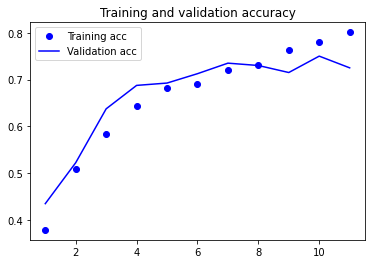

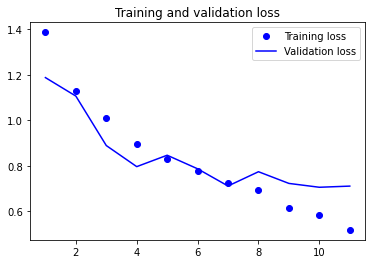

In [ ]:
accuracy_graph(history)

In [ ]:
model.save('flower_cnn_3.h5')
!cp flower_cnn_3.h5 'drive/MyDrive' 

## Use pretrained model